# Which factors are related to an NBA player being nominated MVP?

#### Every year an NBA player is able to achieve the MVP status. This status is reached by gaining the most share amount of MVP points in a given year. This notebook will research which factors weigh the heaviest upon the achieveable MVP points obtainable. First the data is scraped, then cleaned and finally analysed with the help of visualisation and statistics. 

## Data aquisition by scraping www.basketball-reference.com

In [2]:
#Libraries
import requests
from bs4 import BeautifulSoup;
import pandas as pd

#### Create get requests for every page from year 1985 up till 2022 and save every page in our folder Data

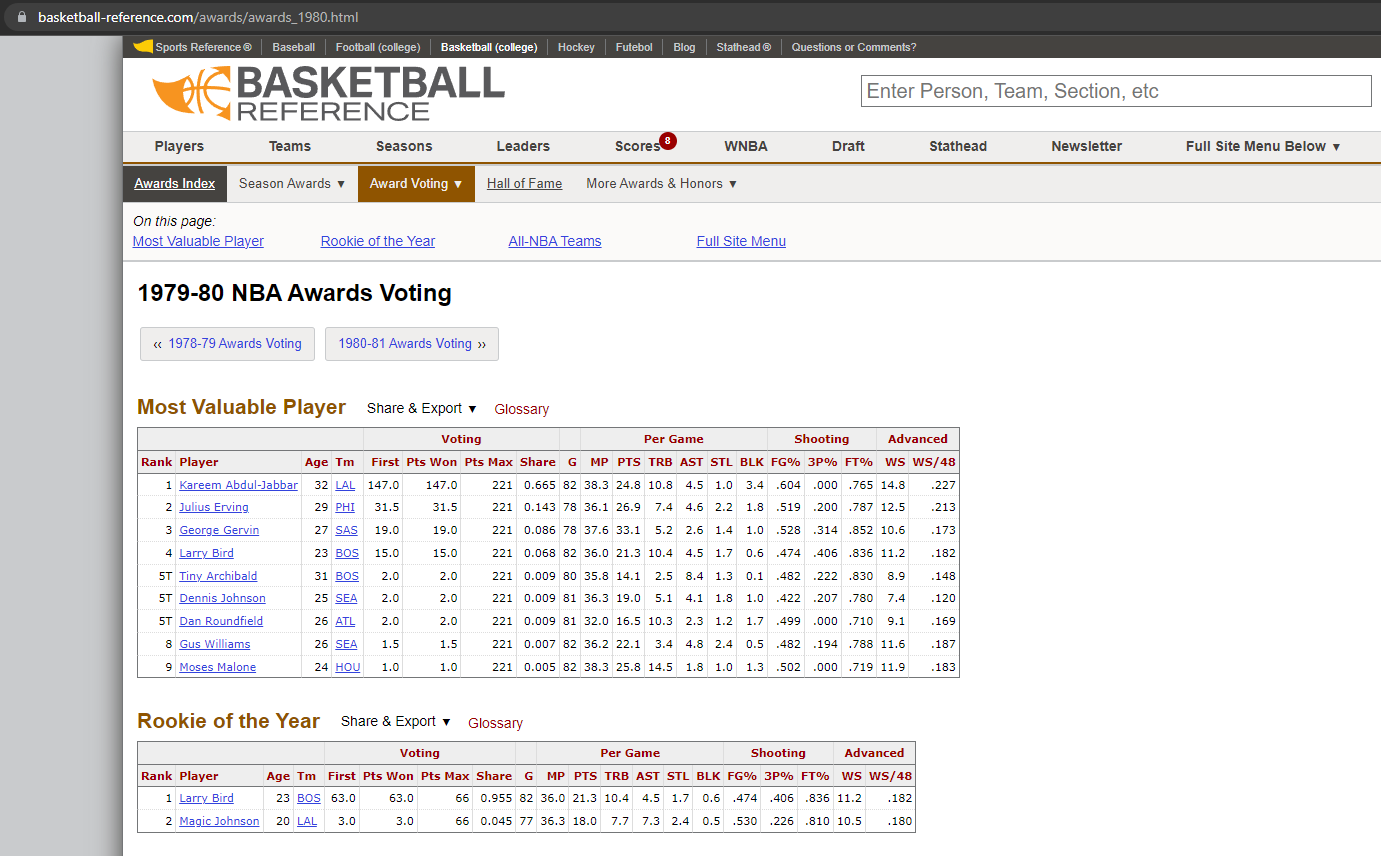

In [3]:
#Format the url link to get the table from year 1985 to 2022 and save it to the folder called Data

list_of_years = list(range(1985, 2023))
url_year = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in list_of_years:
    url = url_year.format(year)
    data = requests.get(url)
    
    with open("Data/{}.html".format(year), "w+", encoding="utf-8") as file:
        file.write(data.text)

In [4]:
#Too many requests, the last two got blocked so we redo them
#turn on vpn

url_year = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in list(range(2008, 2023)):
    url = url_year.format(year)
    data = requests.get(url)
    
    with open("Data/{}.html".format(year), "w+", encoding="utf-8") as file:
        file.write(data.text)

#### Open 1 datafile to see if we scraped the page correctly 

In [5]:
#open and parse the html table into a dataframe

with open("Data/1985.html", encoding="utf-8") as f:
    page = f.read()

In [6]:
soup = BeautifulSoup(page, "html.parser")
data_table = soup.find_all(id="mvp")
mvp_1985 = pd.read_html(str(data_table))[0]

In [7]:
mvp_1985.head()

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Rank               Player                Age   
0                  1           Larry Bird                 28   
1                  2        Magic Johnson                 25   
2                  3         Moses Malone                 29   
3                  4  Kareem Abdul-Jabbar                 37   
4                  5       Terry Cummings                 23   

  Unnamed: 3_level_0 Voting                        Unnamed: 8_level_0  \
                  Tm  First Pts Won Pts Max  Share                  G   
0                BOS   73.0   763.0     780  0.978                 80   
1                LAL    1.0   264.0     780  0.338                 77   
2                PHI    0.0   218.0     780  0.279                 79   
3                LAL    0.0   206.0     780  0.264                 79   
4                MIL    2.0   138.0     780  0.177                 79   

  Per Game                             Shooting               Advanced         
        MP   PTS   TRB   AST  STL  BLK      FG%    3P%    FT%       WS  WS/48  
0     39.5  28.7  10.5   6.6  1.6  1.2    0.522  0.427  0.882     15.7  0.238  
1     36.1  18.3   6.2  12.6  1.5  0.3    0.561  0.189  0.843     12.7  0.220  
2     37.4  24.6  13.1   1.6  0.8  1.6    0.469  0.000  0.815     11.9  0.193  
3     33.3  22.0   7.9   3.2  0.8  2.1    0.599  0.000  0.732     11.2  0.204  
4     34.5  23.6   9.1   2.9  1.5  0.8    0.495  0.000  0.741     10.7  0.189

In [8]:
mvp_1985.set_axis(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'], axis=1, inplace=True)

In [9]:
mvp_1985.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Larry Bird,28,BOS,73.0,763.0,780,0.978,80,39.5,28.7,10.5,6.6,1.6,1.2,0.522,0.427,0.882,15.7,0.238
1,2,Magic Johnson,25,LAL,1.0,264.0,780,0.338,77,36.1,18.3,6.2,12.6,1.5,0.3,0.561,0.189,0.843,12.7,0.220
2,3,Moses Malone,29,PHI,0.0,218.0,780,0.279,79,37.4,24.6,13.1,1.6,0.8,1.6,0.469,0.000,0.815,11.9,0.193
3,4,Kareem Abdul-Jabbar,37,LAL,0.0,206.0,780,0.264,79,33.3,22.0,7.9,3.2,0.8,2.1,0.599,0.000,0.732,11.2,0.204
4,5,Terry Cummings,23,MIL,2.0,138.0,780,0.177,79,34.5,23.6,9.1,2.9,1.5,0.8,0.495,0.000,0.741,10.7,0.189


#### Merge all the MVP tables from 1985 - 2022 and add the column Year to keep track which year the MVP is from

In [10]:
#Parse every table and put them in a list

dataframe_list = []

for year in list_of_years:
    with open("Data/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    data_table = soup.find_all(id="mvp")
    mvp = pd.read_html(str(data_table))[0]
    mvp.set_axis(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'], axis=1, inplace=True)
    mvp["Year"] = year
    
    dataframe_list.append(mvp)

In [11]:
mvp_data = pd.concat(dataframe_list)

In [12]:
mvp_data

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Larry Bird,28,BOS,73.0,763.0,780,0.978,80,39.5,...,10.5,6.6,1.6,1.2,0.522,0.427,0.882,15.7,0.238,1985
1,2,Magic Johnson,25,LAL,1.0,264.0,780,0.338,77,36.1,...,6.2,12.6,1.5,0.3,0.561,0.189,0.843,12.7,0.220,1985
2,3,Moses Malone,29,PHI,0.0,218.0,780,0.279,79,37.4,...,13.1,1.6,0.8,1.6,0.469,0.000,0.815,11.9,0.193,1985
3,4,Kareem Abdul-Jabbar,37,LAL,0.0,206.0,780,0.264,79,33.3,...,7.9,3.2,0.8,2.1,0.599,0.000,0.732,11.2,0.204,1985
4,5,Terry Cummings,23,MIL,2.0,138.0,780,0.177,79,34.5,...,9.1,2.9,1.5,0.8,0.495,0.000,0.741,10.7,0.189,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


In [13]:
mvp_data.to_csv("mvp_data.csv")

### Get more data for better factor understanding 

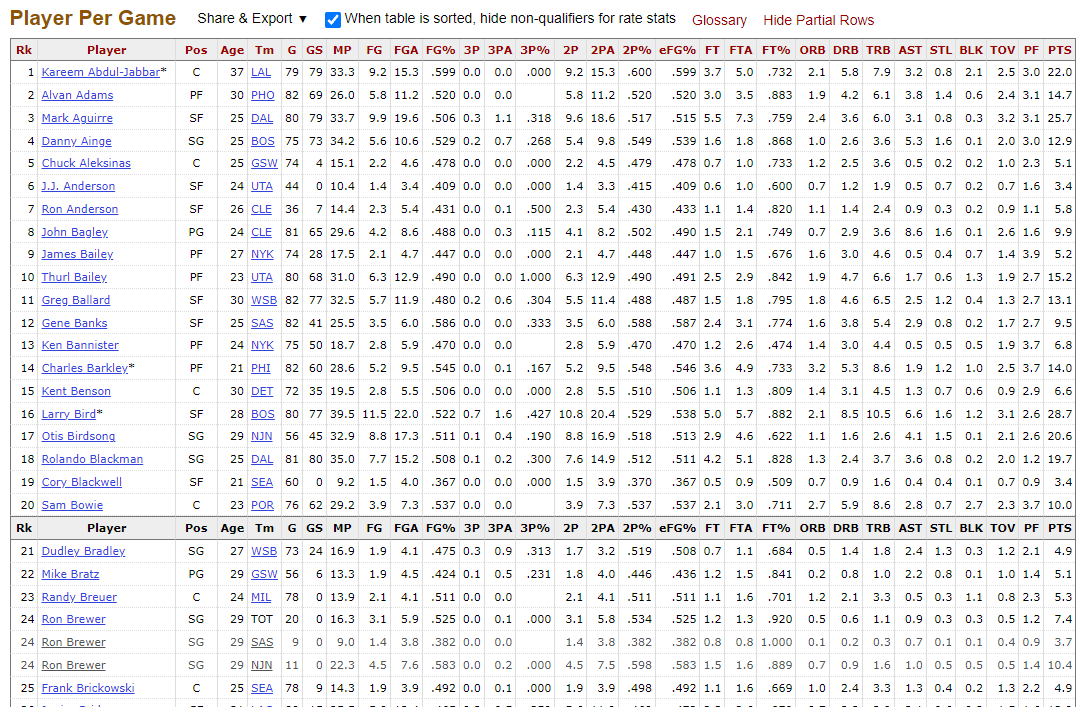

In [14]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

url = player_stats_url.format(1985)
data = requests.get(url)

with open("Player/1985.html", "w+", encoding="utf-8") as f:
    f.write(data.text)

#### This webpage contains a bigger table and uses javascript to load in the table on the client site. Therefore when we scrape it we end up with a page without table.  

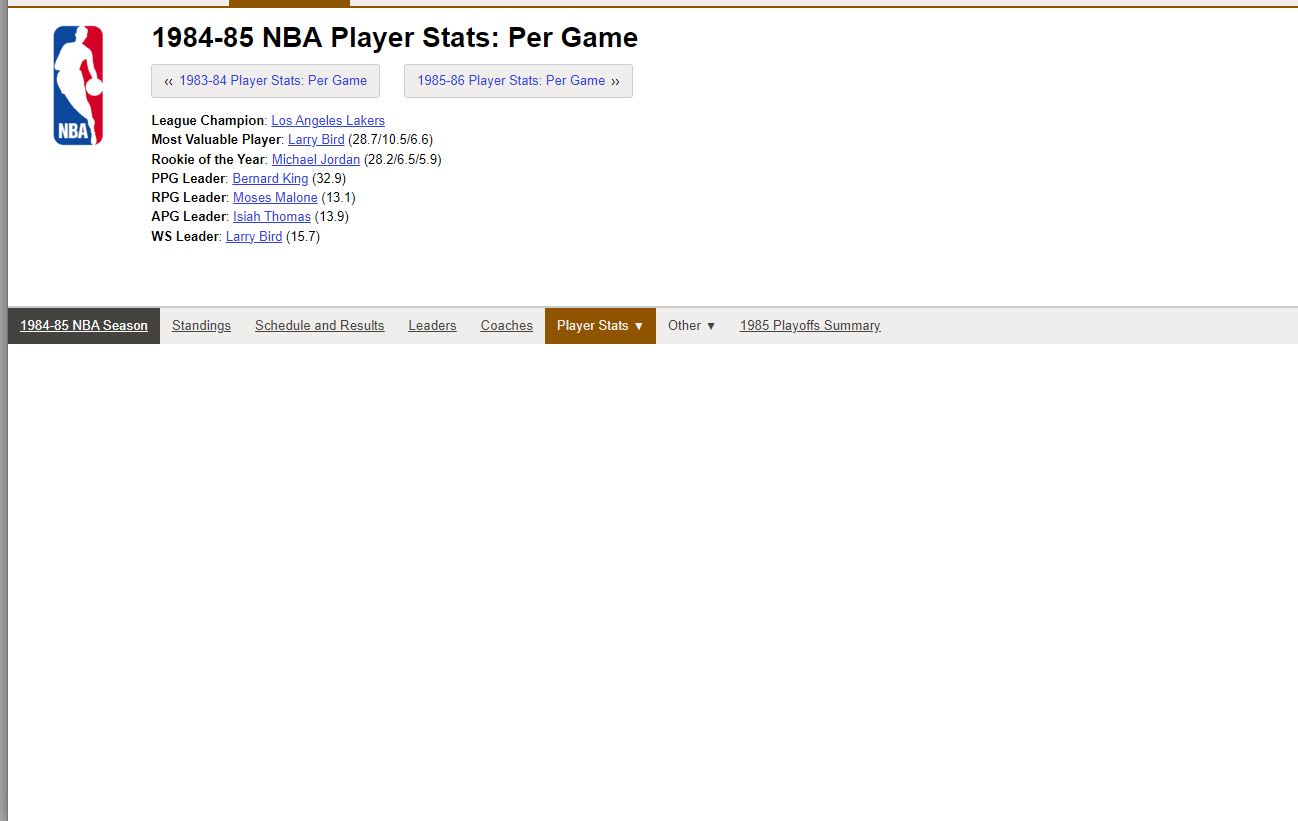

#### The workaround is that we have to use our browser to scrape the data. The package selenium offers automated test software with a webdriver which we can use to scrape the data we need. The webdriver does require a chromedriver download from the website:  chromedriver.chromium.org/downloads  

In [15]:
#Get player stats per game
#Use selenium to deal with javascript that is loaded in in the browser and not with web scraping

import os
from selenium import webdriver 
os.environ['PATH'] += "/path/to/chromedriver"
driver = webdriver.Chrome()

In [16]:
import time

year = 1985
url = player_stats_url.format(year)

driver.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

html = driver.page_source

In [17]:
with open("player/{}.html".format(year), "w+", encoding="utf-8") as f:
    f.write(html)

#### We use decompose method from Beautifulsoup to get rid of the table row that functions as a header but occurs every 20 rows 

In [18]:
with open("player/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
        
soup = BeautifulSoup(page, "html.parser")
soup.find('tr', class_="thead").decompose()
player_data_table = soup.find_all(id="per_game_stats")
player = pd.read_html(str(player_data_table))[0]
player["Year"] = year

player

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,37,LAL,79,79,33.3,9.2,15.3,...,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,1985
1,2,Alvan Adams,PF,30,PHO,82,69,26.0,5.8,11.2,...,1.9,4.2,6.1,3.8,1.4,0.6,2.4,3.1,14.7,1985
2,3,Mark Aguirre,SF,25,DAL,80,79,33.7,9.9,19.6,...,2.4,3.6,6.0,3.1,0.8,0.3,3.2,3.1,25.7,1985
3,4,Danny Ainge,SG,25,BOS,75,73,34.2,5.6,10.6,...,1.0,2.6,3.6,5.3,1.6,0.1,2.0,3.0,12.9,1985
4,5,Chuck Aleksinas,C,25,GSW,74,4,15.1,2.2,4.6,...,1.2,2.5,3.6,0.5,0.2,0.2,1.0,2.3,5.1,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,316,Mike Woodson,SG,26,KCK,78,3,25.6,6.8,13.7,...,0.9,1.7,2.5,1.8,1.5,0.4,1.8,2.8,17.0,1985
372,317,Orlando Woolridge,SF,25,CHI,77,76,36.6,8.8,15.9,...,2.1,3.6,5.6,1.8,0.8,0.5,2.3,2.4,22.9,1985
373,318,James Worthy*,SF,23,LAL,80,76,33.7,7.6,13.3,...,2.1,4.3,6.4,2.5,1.1,0.8,2.5,2.5,17.6,1985
374,319,Danny Young,PG,22,SEA,3,0,8.7,0.7,3.3,...,0.0,1.0,1.0,0.7,1.0,0.0,0.7,0.7,1.3,1985


#### Do the exact same thing but in a for loop to get year 1985 - 2022. We do not need to worry about making too many requests because selenium runs it in the local test software and there is a timeout of 2 seconds. 

In [19]:
for year in list_of_years:
    url = player_stats_url.format(year)

    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    html = driver.page_source
    with open("player/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(html)

In [20]:
player_dataframe_list = []

for year in list_of_years:
    with open("player/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_data_table = soup.find_all(id="per_game_stats")
    player = pd.read_html(str(player_data_table))[0]
    player["Year"] = year
    player_dataframe_list.append(player)

In [21]:
players = pd.concat(player_dataframe_list)

In [22]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,37,LAL,79,79,33.3,9.2,15.3,...,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,1985
1,2,Alvan Adams,PF,30,PHO,82,69,26.0,5.8,11.2,...,1.9,4.2,6.1,3.8,1.4,0.6,2.4,3.1,14.7,1985
2,3,Mark Aguirre,SF,25,DAL,80,79,33.7,9.9,19.6,...,2.4,3.6,6.0,3.1,0.8,0.3,3.2,3.1,25.7,1985
3,4,Danny Ainge,SG,25,BOS,75,73,34.2,5.6,10.6,...,1.0,2.6,3.6,5.3,1.6,0.1,2.0,3.0,12.9,1985
4,5,Chuck Aleksinas,C,25,GSW,74,4,15.1,2.2,4.6,...,1.2,2.5,3.6,0.5,0.2,0.2,1.0,2.3,5.1,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [23]:
players.to_csv("players.csv")

### Third and last dataset that we will scrape about team statistics

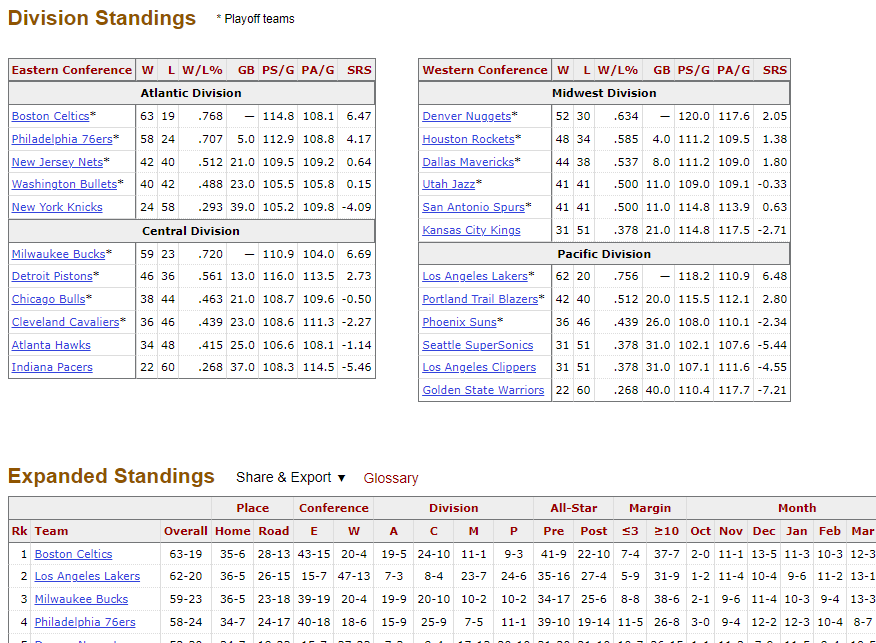

In [24]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

for year in list_of_years:
    url = team_stats_url.format(year) 
    data = requests.get(url)
    with open("Team/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [25]:
################# VPN

In [25]:
for year in list(range(2008, 2023)):
    url = team_stats_url.format(year)
    data = requests.get(url)  
    
    with open("Team/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [26]:
standings = []
for year in list_of_years:
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    every_table = soup.find(id="divs_standings_E")
    every_df = pd.read_html(str(every_table))[0]
    every_df["Year"] = year
    every_df["Team"] = every_df["Eastern Conference"]
    every_df = every_df.drop(columns=['Eastern Conference'])
    standings.append(every_df)
    
    win_table = soup.find(id="divs_standings_W")
    win_df = pd.read_html(str(win_table))[0]
    win_df["Year"] = year
    win_df["Team"] = win_df["Western Conference"]
    win_df = win_df.drop(columns=['Western Conference'])
    standings.append(win_df)

In [27]:
teams = pd.concat(standings)

In [28]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,63,19,.768,—,114.8,108.1,6.47,1985,Boston Celtics*
1,58,24,.707,5.0,112.9,108.8,4.17,1985,Philadelphia 76ers*
2,42,40,.512,21.0,109.5,109.2,0.64,1985,New Jersey Nets*
3,40,42,.488,23.0,105.5,105.8,0.15,1985,Washington Bullets*
4,24,58,.293,39.0,105.2,109.8,-4.09,1985,New York Knicks
...,...,...,...,...,...,...,...,...,...
13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [29]:
teams.to_csv("teams.csv")

#### Now we have 3 datasets:

- mvp_data.csv which contains the dataset of every player that got at least 1 voted point and his/her average stats per game from 1985 - 2022
- players.csv with every player that played in a year from 1985 - 2022. This set contains more players and more statistics per player than MVPS such as his played position, throws per game, assists per game etc.
- teams.csv which shows how well a team is performing with the hindsight idea; will a player be more likely to be MVP if the rest of his team is performing well.

## Data Cleaning

#### Shrink the mvp data because we will only require the columns that contain the information that is relevant to the MVP status and not the other statistics because we use our players.csv dataset for those statistics. 

In [30]:
mvp_data = mvp_data[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [31]:
mvp_data.head()

,Player,Year,Pts Won,Pts Max,Share
0,Larry Bird,1985,763.0,780,0.978
1,Magic Johnson,1985,264.0,780,0.338
2,Moses Malone,1985,218.0,780,0.279
3,Kareem Abdul-Jabbar,1985,206.0,780,0.264
4,Terry Cummings,1985,138.0,780,0.177


#### Clean players.csv 

In [32]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,37,LAL,79,79,33.3,9.2,15.3,...,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,1985
1,2,Alvan Adams,PF,30,PHO,82,69,26.0,5.8,11.2,...,1.9,4.2,6.1,3.8,1.4,0.6,2.4,3.1,14.7,1985
2,3,Mark Aguirre,SF,25,DAL,80,79,33.7,9.9,19.6,...,2.4,3.6,6.0,3.1,0.8,0.3,3.2,3.1,25.7,1985
3,4,Danny Ainge,SG,25,BOS,75,73,34.2,5.6,10.6,...,1.0,2.6,3.6,5.3,1.6,0.1,2.0,3.0,12.9,1985
4,5,Chuck Aleksinas,C,25,GSW,74,4,15.1,2.2,4.6,...,1.2,2.5,3.6,0.5,0.2,0.2,1.0,2.3,5.1,1985


In [33]:
players = players.drop(columns=['Rk'])

In [34]:
players["Player"] = players["Player"].str.replace("*", "")

#### A player can play for multiple teams in one year, however this causes duplicates in our dataset. 

In [35]:
players.groupby(["Player", "Year"]).get_group(("Greg Anderson", 1991))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [36]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
    
players = players.groupby(["Player", "Year"]).apply(single_row)

In [37]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                            
A.C. Green    1986 116     A.C. Green  PF  22  LAL  82   1  18.8  2.5   4.7   
              1987 121     A.C. Green  PF  23  LAL  79  72  28.4  4.0   7.4   
              1988 130     A.C. Green  PF  24  LAL  82  64  32.1  3.9   7.8   
              1989 138     A.C. Green  PF  25  LAL  82  82  30.6  4.9   9.2   
              1990 146     A.C. Green  PF  26  LAL  82  82  33.0  4.7   9.8   
              1991 164     A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 174     A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 157     A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 177     A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 165     A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 190     A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 200     A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 192     A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 183     A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 184     A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 187     A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 57   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 127   A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 138   A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 190    A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   

                         FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year            ...                                           
A.C. Green    1986 116  .539  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2  2.8   
              1987 121  .538  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3  2.2   
              1988 130  .503  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5  2.5   
              1989 138  .529  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5  2.1   
              1990 146  .478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4  2.5   
              1991 164  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 174  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 157  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 177  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 165  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 190  .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 200  .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 192  .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 183  .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 184  .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 187  .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 57   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 127  .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 138  .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 190  .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   

                         PTS  Year  
Player        Year                  
A.C. Green    1986 116   6.4  1986  
              1987 121  10.8  1987  
              1988 130  11.4  1988  
              1989 138  13.3  1989  
              1990 146  12.9  1990  
              1991 164   9.1  1991  
              1992 174  13.6  1992  
              1993 157  12.8  1993  
              1994 177  14.7  1994  
              1995 165  11.2  1995  
              1996 190   7.5  1996  
              1997 200   7.2  1997  
              1998 192   7.3  1998  
              1999 183   4.9  1999  
     

In [38]:
players.index = players.index.droplevel()

In [39]:
players.index = players.index.droplevel()

In [40]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
116,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
121,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
130,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
138,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
146,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [41]:
combined_datasets = players.merge(mvp_data, how="outer", on=["Player", "Year"])

#### It did merge succesfully, however all the players that have zero points towards MVP have NaN values. 

In [42]:
combined_datasets.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,NaN,NaN,NaN
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,NaN,NaN,NaN
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,NaN,NaN,NaN
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,NaN,NaN,NaN
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN


In [43]:
combined_datasets[combined_datasets["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
157,Adrian Dantley,SF,30,UTA,76,75,36.1,10.8,19.1,.563,...,3.5,0.8,0.1,3.0,2.7,29.8,1986,2.0,780.0,0.003
159,Adrian Dantley,SF,32,DET,69,50,31.1,6.4,12.5,.514,...,2.5,0.6,0.1,2.0,2.1,20.0,1988,1.0,800.0,0.001
213,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
309,Alex English,SF,31,DEN,81,81,36.1,11.6,22.4,.518,...,4.2,1.2,0.6,3.1,3.2,27.9,1985,12.0,780.0,0.015
310,Alex English,SF,32,DEN,81,81,37.3,11.7,23.3,.504,...,4.0,0.9,0.4,3.1,2.9,29.8,1986,55.0,780.0,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16128,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
16132,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
16538,World B. Free,SG,31,CLE,71,50,31.7,8.6,18.7,.459,...,4.5,1.1,0.2,2.0,2.3,22.5,1985,2.0,780.0,0.003
16574,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [44]:
combined_datasets[["Pts Won", "Pts Max", "Share"]] = combined_datasets[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [45]:
combined_datasets.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0


#### Cleaning the third dataset teams 

In [46]:
teams.head(20)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,63,19,.768,—,114.8,108.1,6.47,1985,Boston Celtics*
1,58,24,.707,5.0,112.9,108.8,4.17,1985,Philadelphia 76ers*
2,42,40,.512,21.0,109.5,109.2,0.64,1985,New Jersey Nets*
3,40,42,.488,23.0,105.5,105.8,0.15,1985,Washington Bullets*
4,24,58,.293,39.0,105.2,109.8,-4.09,1985,New York Knicks
5,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1985,Central Division
6,59,23,.720,—,110.9,104.0,6.69,1985,Milwaukee Bucks*
7,46,36,.561,13.0,116.0,113.5,2.73,1985,Detroit Pistons*
8,38,44,.463,21.0,108.7,109.6,-0.50,1985,Chicago Bulls*
9,36,46,.439,23.0,108.6,111.3,-2.27,1985,Cleveland Cavaliers*


In [47]:
teams = teams[~teams["W"].str.contains("Division")]

In [48]:
teams.head(20)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,63,19,.768,—,114.8,108.1,6.47,1985,Boston Celtics*
1,58,24,.707,5.0,112.9,108.8,4.17,1985,Philadelphia 76ers*
2,42,40,.512,21.0,109.5,109.2,0.64,1985,New Jersey Nets*
3,40,42,.488,23.0,105.5,105.8,0.15,1985,Washington Bullets*
4,24,58,.293,39.0,105.2,109.8,-4.09,1985,New York Knicks
6,59,23,.720,—,110.9,104.0,6.69,1985,Milwaukee Bucks*
7,46,36,.561,13.0,116.0,113.5,2.73,1985,Detroit Pistons*
8,38,44,.463,21.0,108.7,109.6,-0.50,1985,Chicago Bulls*
9,36,46,.439,23.0,108.6,111.3,-2.27,1985,Cleveland Cavaliers*
10,34,48,.415,25.0,106.6,108.1,-1.14,1985,Atlanta Hawks


In [49]:
teams["Team"] = teams["Team"].str.replace("*", "")

<ipython-input-49-f4bd07353d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "")


In [50]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,63,19,.768,—,114.8,108.1,6.47,1985,Boston Celtics
1,58,24,.707,5.0,112.9,108.8,4.17,1985,Philadelphia 76ers
2,42,40,.512,21.0,109.5,109.2,0.64,1985,New Jersey Nets
3,40,42,.488,23.0,105.5,105.8,0.15,1985,Washington Bullets
4,24,58,.293,39.0,105.2,109.8,-4.09,1985,New York Knicks


#### Our teams dataset contains the team name written in full, however the combined dataset has the teamname as an abbreviation. 

In [51]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New Jersey Nets',
       'Washington Bullets', 'New York Knicks', 'Milwaukee Bucks',
       'Detroit Pistons', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Atlanta Hawks', 'Indiana Pacers', 'Denver Nuggets',
       'Houston Rockets', 'Dallas Mavericks', 'Utah Jazz',
       'San Antonio Spurs', 'Kansas City Kings', 'Los Angeles Lakers',
       'Portland Trail Blazers', 'Phoenix Suns', 'Seattle SuperSonics',
       'Los Angeles Clippers', 'Golden State Warriors',
       'Sacramento Kings', 'Charlotte Hornets', 'Miami Heat',
       'Orlando Magic', 'Minnesota Timberwolves', 'Toronto Raptors',
       'Vancouver Grizzlies', 'Washington Wizards', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [52]:
combined_datasets["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH', 'KCK'], dtype=object)

#### Find a HTML table that contains the full names with abbreviations and create a dictionary out of it to help us merge this last dataset. 

In [53]:
url_abbreviations = "https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations"

data = requests.get(url_abbreviations)
with open("Abbreviations/abbreviations_list.html", "w+", encoding="utf-8") as file:
    file.write(data.text)
    
with open("Abbreviations/abbreviations_list.html", encoding="utf-8") as f:
    page = f.read()
    
soup = BeautifulSoup(page, "html.parser")
data_table = soup.find_all("table")
abbreviations = pd.read_html(str(data_table))[0]

In [54]:
abbreviations.columns = abbreviations.iloc[0]
abbreviations.drop(abbreviations.index[0], inplace=True)

In [55]:
abbreviations.head()

,Abbreviation/Acronym,Franchise
1,ATL,Atlanta Hawks
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Hornets
5,CHI,Chicago Bulls


In [56]:
abbreviations_dict = pd.Series(abbreviations['Franchise'].values, index=abbreviations["Abbreviation/Acronym"]).to_dict()

In [57]:
missing_abbreviations = [i for i in combined_datasets["Tm"].unique() if i not in abbreviations_dict]
missing_abbreviations

['PHO', 'WSB', 'NOH', 'CHO', 'VAN', 'SEA', 'NJN', 'NOK', 'BRK', 'CHH', 'KCK']

In [58]:
abbreviations_dict['PHO'] = 'Phoenix Suns'
abbreviations_dict['WSB'] = 'Washington Bullets'
abbreviations_dict['NOH'] = 'New Orleans Hornets'
abbreviations_dict['CHO'] = 'Charlotte Hornets'
abbreviations_dict['VAN'] = 'Vancouver Grizzlies'
abbreviations_dict['SEA'] = 'Seattle SuperSonics'
abbreviations_dict['NJN'] = 'New Jersey Nets'
abbreviations_dict['NOK'] = 'New Orleans/Oklahoma City Hornets'
abbreviations_dict['BRK'] = 'Brooklyn Nets'
abbreviations_dict['CHH'] = 'Charlotte Hornets'


In [59]:
missing_full_name = [i for i in teams["Team"].unique() if i not in abbreviations_dict.values()]
missing_full_name

['Kansas City Kings', 'Charlotte Bobcats']

In [60]:
abbreviations_dict['CHA'] = 'Charlotte Bobcats'
abbreviations_dict['KCK'] = 'Charlotte Bobcats'

#### Map our combined dataset team column on the created dictionary with the abbreviations.  

In [61]:
combined_datasets["Team"] = combined_datasets["Tm"].map(abbreviations_dict)

In [62]:
combined_datasets.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers


#### Merge the already combined dataset of players and mvp with the last dataset teams. 

In [63]:
final_dataset = combined_datasets.merge(teams, how="outer", on=["Team", "Year"])

In [64]:
final_dataset

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,.513,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,.579,...,780.0,0.009,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,.667,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,.564,...,780.0,0.173,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
16722,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
16723,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
16724,Tony Snell,SG,25,MIL,80,80,29.2,3.1,6.8,.455,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [65]:
combined_datasets

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
16721,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
16722,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
16723,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [66]:
final_dataset = final_dataset[final_dataset["Team"] != "Kansas City Kings"]

#### Transform the columns that are strings to numeric if possible. 

In [67]:
final_dataset = final_dataset.apply(pd.to_numeric, errors="ignore")

In [68]:
final_dataset.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [69]:
final_dataset["GB"].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5', nan], dtype=object)

In [70]:
final_dataset["GB"] = final_dataset["GB"].str.replace("—", "0")
final_dataset["GB"] = final_dataset["GB"].fillna(0)

In [71]:
final_dataset["GB"] = pd.to_numeric(final_dataset["GB"])

#### Drop NaN values 

In [72]:
final_dataset.isna().sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2434
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         561
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W            14
L            14
W/L%         14
GB            0
PS/G         14
PA/G         14
SRS          14
dtype: int64

In [73]:
final_dataset.drop(["FG%", "3P%", "2P%", "eFG%", "FT%"], axis=1, inplace=True)
final_dataset = final_dataset.dropna()

In [74]:
final_dataset

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,0.3,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,0.0,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,0.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.0,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.5,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
16721,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.1,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
16722,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.4,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
16723,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.5,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [75]:
final_dataset.to_csv("final_dataset.csv")

## Data Analysis and visualisation

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Does the position you play influence your ability to be MVP? 

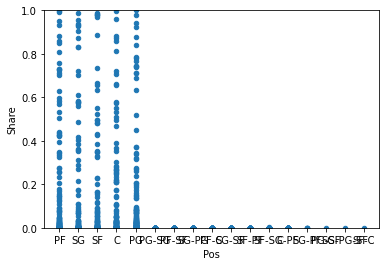

In [77]:
var = 'Pos'
data = pd.concat([final_dataset['Share'], final_dataset[var]], axis=1)
data.plot.scatter(x=var, y='Share', ylim=(0,1));

In [78]:
final_dataset["Pos"].value_counts()

PF          3430
C           3382
SG          3362
PG          3201
SF          3079
SF-SG         39
PG-SG         33
SG-SF         32
C-PF          31
SG-PG         31
PF-C          29
PF-SF         29
SF-PF         26
SG-PF          4
PG-SF          1
SG-PG-SF       1
SF-C           1
Name: Pos, dtype: int64

#### Do your MVP dreams fade away when you reach the age of 30? 

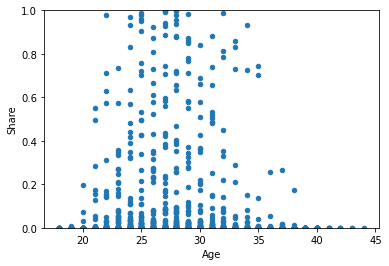

In [79]:
var = 'Age'
data = pd.concat([final_dataset['Share'], final_dataset[var]], axis=1)
data.plot.scatter(x=var, y='Share', ylim=(0,1));

#### Can you still reach MVP if you don't play that much? 

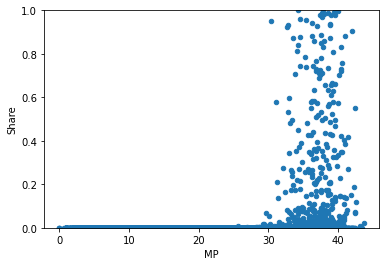

In [80]:
var = 'MP'
data = pd.concat([final_dataset['Share'], final_dataset[var]], axis=1)
data.plot.scatter(x=var, y='Share', ylim=(0,1));

#### Does a good player in a bad team get extra credits? 

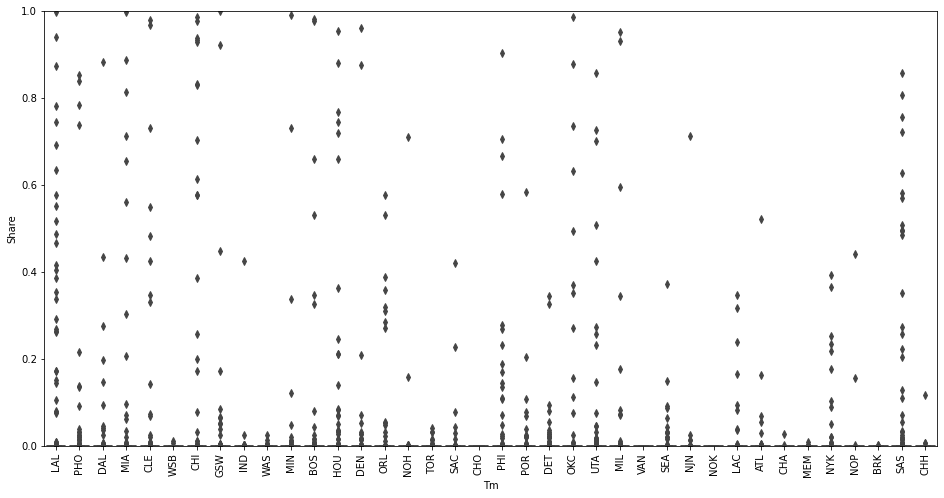

In [81]:
var = 'Tm'
data = pd.concat([final_dataset['Share'], final_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Share", data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(rotation=90);

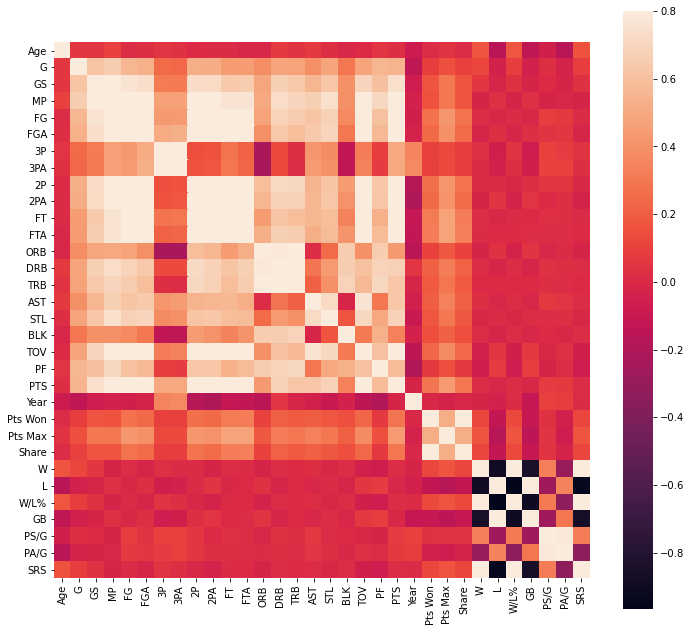

In [82]:
f, ax = plt.subplots(figsize=(12, 11))
sns.heatmap(final_dataset.corr(), vmax=.8, square=True);

####  Free throw attempts per game has high correlation with the share amount of obtainable MVP points. Perhaps because it is a lot of tv time focused on one individual player. 

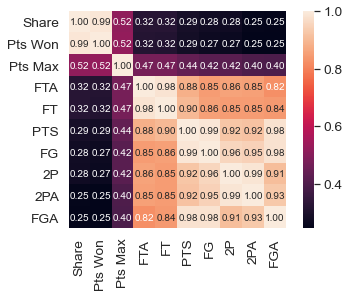

In [83]:
corrmat = final_dataset.corr()
k = 10 
cols = corrmat.nlargest(k, 'Share')['Share'].index
cm = np.corrcoef(final_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

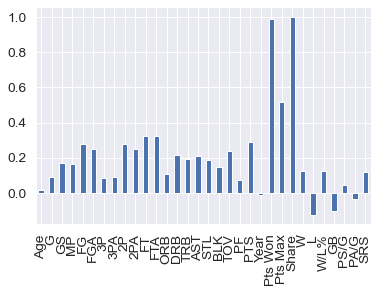

In [84]:
final_dataset.corr()["Share"].plot.bar();

In [85]:
highest_free_throw = final_dataset.sort_values("FTA", ascending=False).head(10)
highest_free_throw.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
14561,Shaquille O'Neal,C,28,LAL,74,74,39.5,11.0,19.2,0.0,...,1240.0,0.466,Los Angeles Lakers,56.0,26.0,0.683,0.0,100.6,97.2,3.74
3900,Charles Barkley,PF,24,PHI,80,80,39.6,9.4,16.0,0.6,...,800.0,0.136,Philadelphia 76ers,36.0,46.0,0.439,21.0,105.7,107.1,-0.79
11832,Michael Jordan,SG,23,CHI,82,82,40.0,13.4,27.8,0.1,...,780.0,0.576,Chicago Bulls,40.0,42.0,0.488,17.0,104.8,103.9,1.26
11083,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,4.4,...,1010.0,0.363,Houston Rockets,44.0,28.0,0.611,0.0,117.8,114.8,3.13
904,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,1.4,...,1000.0,0.706,Philadelphia 76ers,51.0,31.0,0.622,0.0,109.9,107.3,2.57
13864,Dwight Howard,C,25,ORL,78,78,37.6,7.9,13.4,0.0,...,1210.0,0.531,Orlando Magic,52.0,30.0,0.634,6.0,99.2,93.7,4.92
10054,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.1,...,1010.0,0.723,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
11637,Karl Malone,PF,25,UTA,80,80,39.1,10.1,19.5,0.1,...,850.0,0.426,Utah Jazz,51.0,31.0,0.622,0.0,104.7,99.7,4.01
5094,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,1.0,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
13273,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,1.1,...,1000.0,0.595,Milwaukee Bucks,51.0,31.0,0.622,0.0,115.5,112.1,3.22


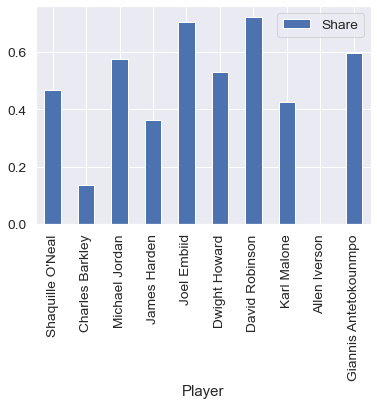

In [86]:
highest_free_throw.plot.bar("Player", "Share");

#### This concludes our analysis and presentation. We were able to answer our main question of which factors influence the MVP nomination with subquestions. On one hand the results were expected such as points scored per game influences the MVP nomination a lot, however, the result that a 2 point score weighs more in correlation compared to a 3 points score is fascinating. Moreover, the effect of the free throws attempts per game is also suprising. Our hypothesis to why this is, is because a player might get a lot of individual tv screen time for a free throw attempt. This screen time could effect people positively when they decide who they award with MVP points.

#### Our conducted research has a possible limitation. We are dealing with data from 1985 till 2022, but we did not investigate if people awarded NBA players MVP points for different reasons than they do in 2022. There could be a subcultural difference between the 80’s and the last era.

#### Further research can be done in testing our hypothesis that individual screentime correlates highly with getting points towards MVP. This could be done for example by using image recognition and count how often a player occurs on a screen and if this has correlation to his MVP points. Or if you are into gambling, you can create a machine learning model and forecast which player is most likely to gain the most MVP points and use that information to bet against your friends or gambling companies.

In [87]:
# Wouter van Zeijl
# 2533591
# Group 36